In [16]:
#importação das bibliotecas a serem utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#Importação da planilha com dados históricos de saneamento básico
sanit = pd.read_excel('at_least_basic_sanitation_overall_access_percent.xlsx')
sanit = sanit[['country', 2014]].copy() #Filtro por um ano específico
sanit = sanit.rename(columns={'country': 'Country', 2014: 'Sanitation'})
sanit.head()

,Country,Sanitation
0,Aruba,97.5
1,Afghanistan,40.7
2,Angola,47.4
3,Albania,97.7
4,Andorra,100.0


In [18]:
#Importação da planilha com dados históricos de Indice de Desenvolvimento Humano
hdi = pd.read_excel('hdi_human_development_index.xlsx')
hdi = hdi[['country', 2014]].copy() #Filtro por um ano específico
hdi = hdi.rename(columns={'country': 'Country', 2014: 'HDI'})
hdi.head()

,Country,HDI
0,Afghanistan,0.490
1,Angola,0.565
2,Albania,0.788
3,Andorra,0.850
4,United Arab Emirates,0.860


In [19]:
#União das informações de HDI e Sanitation de cada país
df = pd.merge(hdi, sanit, on='Country')
df = df.sort_values(by=['HDI'])
df.head()

,Country,HDI,Sanitation
125,Niger,0.360,12.80
28,Central African Republic,0.362,25.20
164,Chad,0.403,8.84
114,Mali,0.412,36.20
14,Burkina Faso,0.413,18.80


In [20]:
#Filtro por um ano específico
happy = pd.read_excel('hapiscore_whr.xlsx')
happy = happy[['country', 2014]].copy()
happy = happy.rename(columns={'country': 'Country', 2014: 'Happiness'})

In [21]:
#Acrescentando a informação de Happiness ao primeiro dataframe
df = pd.merge(df, happy, on='Country', how='right')
df = df.sort_values(by=['HDI']) #Ordenação por valor Ascendente de HDI para analisar o que acontece com os outros indicadores enquanto esse sobe
df.head()

,Country,HDI,Sanitation,Happiness
107,Niger,0.360,12.80,36.7
23,Central African Republic,0.362,25.20,NaN
142,Chad,0.403,8.84,43.2
96,Mali,0.412,36.20,45.8
12,Burkina Faso,0.413,18.80,44.2


In [23]:
fertility = pd.read_excel('children_per_woman_total_fertility.xlsx')
fertility = fertility[['country', 2014]].copy()
fertility = fertility.rename(columns={'country': 'Country', 2014: 'Fertility'})
fertility.head()

,Country,Fertility
0,Aruba,1.76
1,Afghanistan,4.80
2,Angola,5.77
3,Albania,1.71
4,Netherlands Antilles,1.87


In [24]:
df = pd.merge(df, fertility, on='Country', how='right')
df = df.sort_values(by=['HDI']) #Ordenação por valor Ascendente de HDI para analisar o que acontece com os outros indicadores enquanto esse sobe
df.head()

,Country,HDI,Sanitation,Happiness,Fertility
132,Niger,0.360,12.80,36.7,7.29
29,Central African Republic,0.362,25.20,NaN,4.94
175,Chad,0.403,8.84,43.2,6.05
118,Mali,0.412,36.20,45.8,6.15
15,Burkina Faso,0.413,18.80,44.2,5.44


In [26]:
#Normalização dos valores para poder exibir em um mesmo gráfico
df.HDI = df.HDI / max(df.HDI)
df.Sanitation = df.Sanitation / max(df.Sanitation)
df.Happiness = df.Happiness / max(df.Happiness)
df.Fertility = df.HDI / max(df.Fertility)
df.head()

,Country,HDI,Sanitation,Happiness,Fertility
132,Niger,0.379747,0.1280,0.482895,0.052091
29,Central African Republic,0.381857,0.2520,NaN,0.052381
175,Chad,0.425105,0.0884,0.568421,0.058314
118,Mali,0.434599,0.3620,0.602632,0.059616
15,Burkina Faso,0.435654,0.1880,0.581579,0.059760


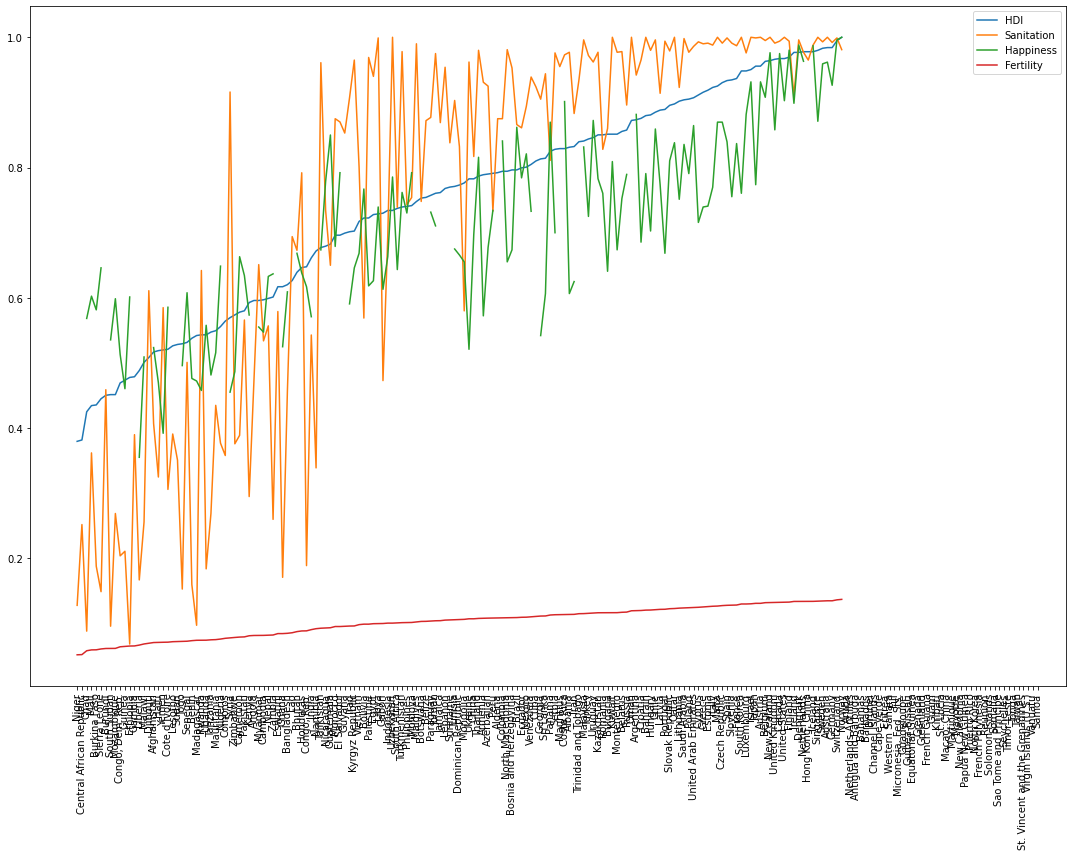

In [29]:
#Gráfico com os valores de HDI, Happiness e Sanitation
plt.figure(figsize=(15, 12), tight_layout=True)
plt.plot(df.Country, df.HDI, label='HDI')
plt.plot(df.Country, df.Sanitation, label='Sanitation')
plt.plot(df.Country, df.Happiness, label='Happiness')
plt.plot(df.Country, df.Fertility, label='Fertility')
plt.xticks(rotation=90)
plt.legend()
plt.show()

                 HDI  Sanitation  Happiness  Fertility
HDI         1.000000    0.876430   0.820904   1.000000
Sanitation  0.876430    1.000000   0.689851   0.876430
Happiness   0.820904    0.689851   1.000000   0.820904
Fertility   1.000000    0.876430   0.820904   1.000000


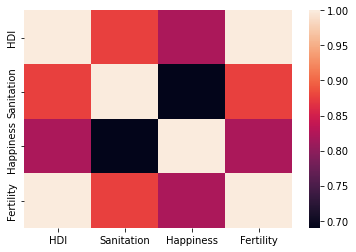

In [31]:
correlation = df.corr()
print(correlation)
sns.heatmap(correlation)

**Análise:** Utilizando o gráfico de linhas, e o mapa de calor com a correlação entre os dados analisados, é possível verificar que:

*   Há uma forte correlação entre o índice de Saneamento Básico dos países, e o Índice de Desenvolvimento Humano (IDH), ou seja os países com maior IDH tendem a ter maior Saneamento Básico. Correlação = 0,87.
*   Em países onde o IDH é maior, a média de filhos por mulher também é maior. Correlação = 0,82.
*   Existe uma correlação forte entre a média de filhos por mulher e a sensação de felicidade. Correlação = 0,82.
*    Existe uma correlação entre o Índice de Saneamento Básico e a sensação de felicidade. Essa correlação (0,68), pode ser consirada entre forte e moderada, dependendo do autor.




---
Fonte de Dados: https://www.gapminder.org
---
Referências:
---
* https://periodicos.ufpe.br/revistas/politicahoje/article/viewFile/3852/3156
* https://link.springer.com/article/10.1057/jt.2009.5